In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np
import analyzer as an
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.mode.chained_assignment = None 

df = pd.read_csv("problems_chamomiles.csv", delimiter=";")

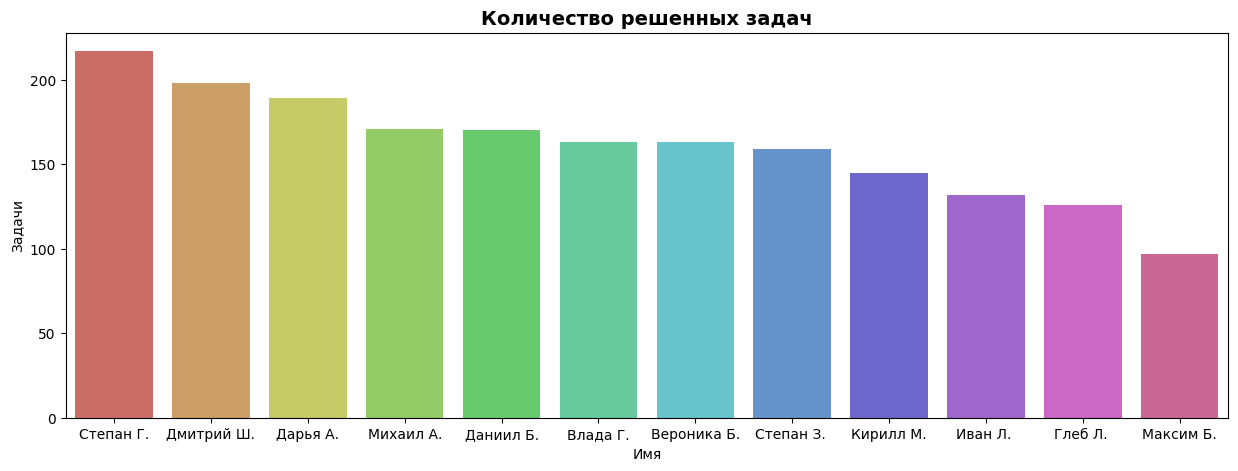

In [2]:
total_problems = an.total_problems(df).sort_values(ascending=False).reset_index(name="Задачи").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Количество решенных задач", weight="heavy", size=14)
sns.barplot(total_problems, x="Имя", y="Задачи", palette="hls", hue="Имя")
#plt.axhline(total_problems["Задачи"].mean())
plt.show()

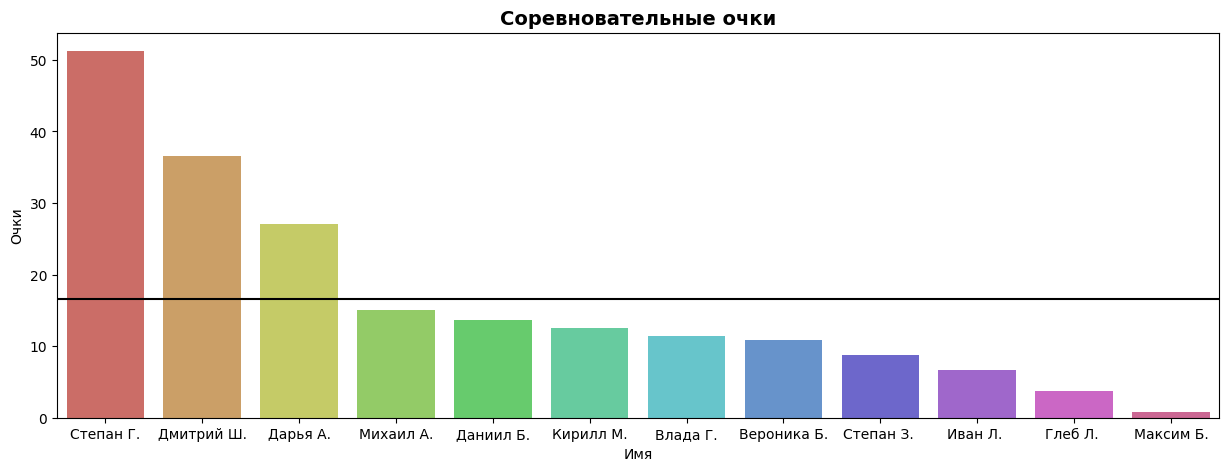

In [3]:
comp_points = an.competative_points(df, weight_func = "sigm").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette="hls", hue="Имя")
plt.axhline(comp_points["Очки"].mean(), c="black")
#plt.axhline(total_problems["Задачи"].mean())
plt.show()

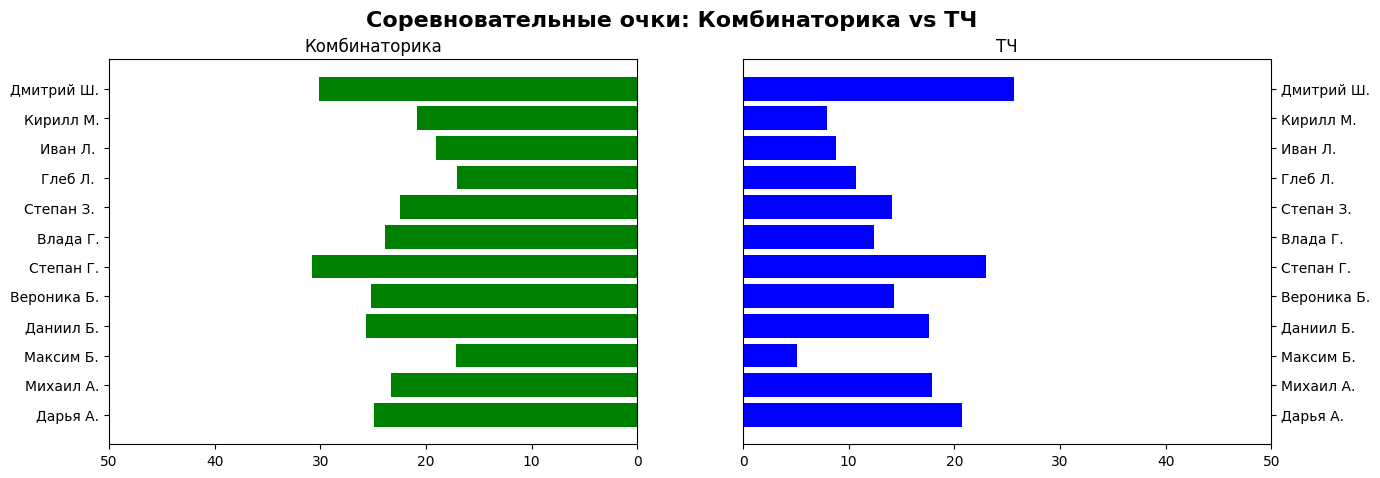

In [4]:
points_c = an.competative_points(df, topic='Комбинаторика', weight_func="sqrt")
points_t = an.competative_points(df, topic='ТЧ', weight_func="sqrt")

plt.figure(figsize=(15, 5))
plt.suptitle("Соревновательные очки: Комбинаторика vs ТЧ", size=16, weight='heavy')

plt.subplot(1, 2, 1)
plt.title("Комбинаторика")
plt.barh(points_t.index.tolist(), points_c, color='g')
plt.gca().set_xlim([50, 0])


plt.subplot(1, 2, 2)
plt.title("ТЧ")
plt.barh(points_t.index.tolist(), points_t, color='b')
plt.tick_params(axis='y', labelleft=False, labelright=True, left = False, right=True)
plt.gca().set_xlim([0, 50])



plt.show()

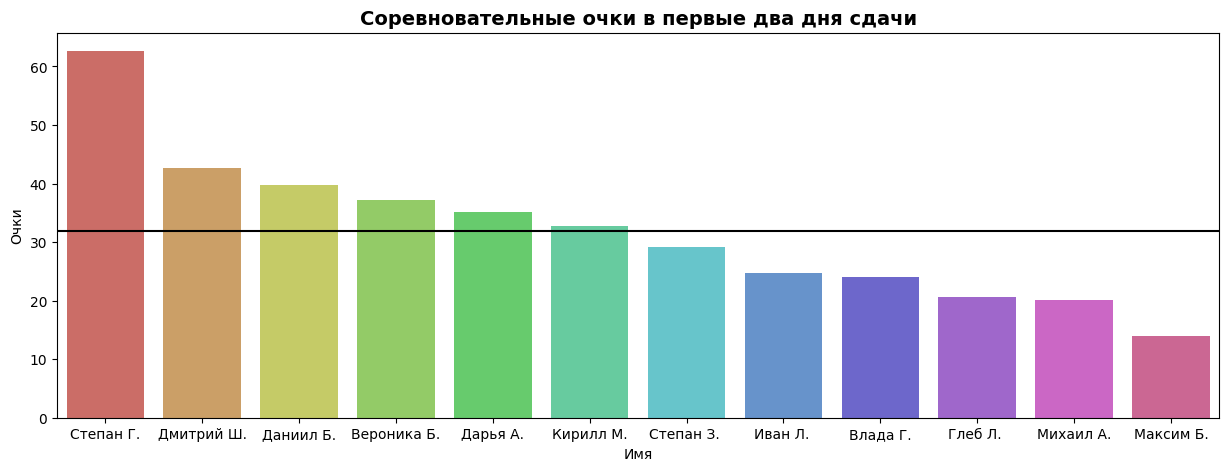

In [5]:
start_comp_points = an.competative_points(df, days=[1,2], weight_func='sqrt').sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Соревновательные очки в первые два дня сдачи", weight="heavy", size=14)
sns.barplot(start_comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
plt.axhline(start_comp_points["Очки"].mean(), c="black")
plt.show()

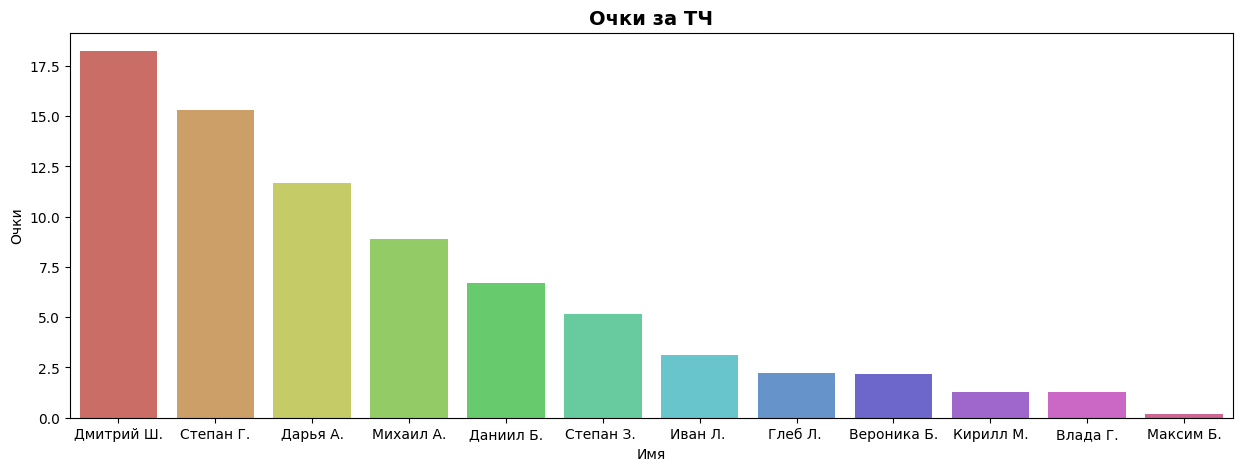

In [6]:
comp_points = an.competative_points(df, weight_func='sigm', topic="ТЧ").sort_values(ascending=False).reset_index(name="Очки").rename(columns={"index":"Имя"})

plt.figure(figsize=(15, 5))
plt.title("Очки за ТЧ", weight="heavy", size=14)
sns.barplot(comp_points, x="Имя", y="Очки", palette='hls', hue="Имя")
#plt.axhline(comp_points["Очки"].mean())
plt.show()

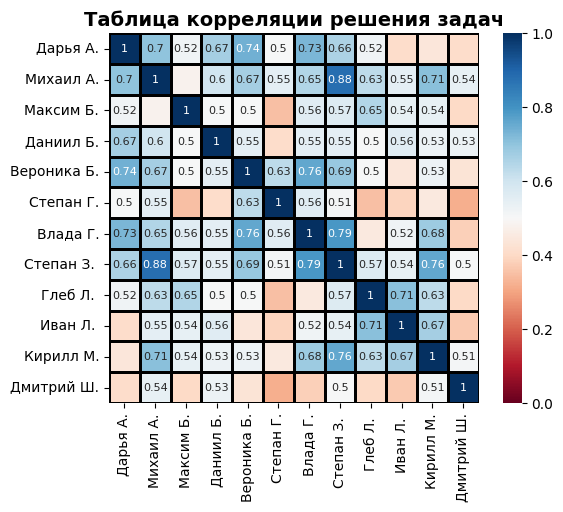

In [7]:
df1 = an.bin_conduit(an.topic_loc(df, topic="Комбинаторика"))
colormap = plt.cm.RdBu
ax = sns.heatmap(
    np.round(df1.corr(numeric_only=True), 2),
    linewidths=0.8,
    vmax=1.0,
    vmin = 0,
    square=True,
    cmap=colormap,
    linecolor="black",
    annot=True,
    annot_kws={"fontsize":8},
)

for i in ax.texts:
    if abs(float(i.get_text())) < 0.5:
        i.set_text("")

plt.title("Таблица корреляции решения задач", weight="heavy", size=14)

plt.show()

In [8]:
stats = an.stats(df, topics=["Комбинаторика", "ТЧ", "Графы"])
stats

,Соревновательные очки,Среднее кол-во очков за задачу,Соревновательные очки в Комбинаторика,Среднее кол-во очков за задачу в Комбинаторика,Соревновательные очки в ТЧ,Среднее кол-во очков за задачу в ТЧ,Соревновательные очки в Графы,Среднее кол-во очков за задачу в Графы
Дарья А.,27.074462,0.143251,5.574893,0.070568,11.661723,0.204592,4.135262,0.133396
Михаил А.,14.986623,0.087641,2.728378,0.035900,8.906696,0.174641,2.315089,0.082682
Максим Б.,0.850760,0.008771,0.636426,0.010973,0.180919,0.010642,0.019845,0.001527
Даниил Б.,13.683762,0.080493,6.674515,0.083431,6.685894,0.128575,0.290104,0.011604
Вероника Б.,10.891194,0.066817,5.844152,0.073052,2.167745,0.049267,0.086974,0.004142
Степан Г.,51.234292,0.236103,12.228768,0.137402,15.288249,0.250627,11.050837,0.290811
Влада Г.,11.370029,0.069755,4.045340,0.052537,1.261931,0.032357,2.287317,0.081690
Степан З.,8.700338,0.054719,1.728378,0.023356,5.135350,0.122270,1.708632,0.061023
Глеб Л.,3.762215,0.029859,0.506674,0.008736,2.240939,0.067907,0.978143,0.046578
Иван Л.,6.637196,0.050282,1.884196,0.029908,3.114929,0.119805,1.269168,0.047006


In [9]:
an.personal_stats(stats, "Максим Б.")

Максим Б.
Соревновательные очки: 0.85, #12
Среднее кол-во очков за задачу: 0.01, #12
Соревновательные очки в Комбинаторика: 0.64, #11
Среднее кол-во очков за задачу в Комбинаторика: 0.01, #11
Соревновательные очки в ТЧ: 0.18, #12
Среднее кол-во очков за задачу в ТЧ: 0.01, #12
Соревновательные очки в Графы: 0.02, #12
Среднее кол-во очков за задачу в Графы: 0.0, #12
